In [250]:
import torch as tc 
from torch import nn, optim 
from torch.utils.data import DataLoader, TensorDataset, random_split 

from torchvision import transforms as T 
from torchvision import datasets

from torchmetrics import Accuracy 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split

from tqdm import tqdm 
import cv2

In [251]:
y = pd.read_csv('/home/ahmadreza/AI/git/rep7/dataset/archive (1)/labels_trainval.csv')

In [252]:
#image_data = datasets.ImageFolder(f'/home/ahmadreza/AI/git/rep7/dataset/archive (1)', T.ToTensor())

In [253]:
frames, _, label, _ = train_test_split(y.drop('class_id', axis=1), y['class_id'], train_size=0.001, random_state=42)

In [254]:
frames, frames.shape

(                          frame  xmin  xmax  ymin  ymax
 127659  1479502708261060160.jpg   297   311   138   151
 13545   1478022257094515079.jpg   113   141   141   158
 3748    1478020420204575229.jpg   392   400   104   115
 119101  1479501980712932914.jpg   220   227   141   148
 136602  1479503766332841188.jpg   156   166   134   151
 ...                         ...   ...   ...   ...   ...
 119879  1479502074715834633.jpg    71   162   140   199
 103694  1479499630049824830.jpg   168   198   140   167
 131932  1479503096288212699.jpg    90   118   142   164
 146867  1479504693891885401.jpg   433   457   116   193
 121958  1479502272229219249.jpg   186   195   139   148
 
 [165 rows x 5 columns],
 (165, 5))

In [255]:
label, label.shape

(127659    1
 13545     1
 3748      5
 119101    1
 136602    3
          ..
 119879    1
 103694    1
 131932    1
 146867    3
 121958    1
 Name: class_id, Length: 165, dtype: int64,
 (165,))

In [256]:
frames = frames.reset_index()

In [257]:
frames

,index,frame,xmin,xmax,ymin,ymax
0,127659,1479502708261060160.jpg,297,311,138,151
1,13545,1478022257094515079.jpg,113,141,141,158
2,3748,1478020420204575229.jpg,392,400,104,115
3,119101,1479501980712932914.jpg,220,227,141,148
4,136602,1479503766332841188.jpg,156,166,134,151
...,...,...,...,...,...,...
160,119879,1479502074715834633.jpg,71,162,140,199
161,103694,1479499630049824830.jpg,168,198,140,167
162,131932,1479503096288212699.jpg,90,118,142,164
163,146867,1479504693891885401.jpg,433,457,116,193


In [258]:
frames.drop('index', axis=1, inplace=True)

In [259]:
frames

,frame,xmin,xmax,ymin,ymax
0,1479502708261060160.jpg,297,311,138,151
1,1478022257094515079.jpg,113,141,141,158
2,1478020420204575229.jpg,392,400,104,115
3,1479501980712932914.jpg,220,227,141,148
4,1479503766332841188.jpg,156,166,134,151
...,...,...,...,...,...
160,1479502074715834633.jpg,71,162,140,199
161,1479499630049824830.jpg,168,198,140,167
162,1479503096288212699.jpg,90,118,142,164
163,1479504693891885401.jpg,433,457,116,193


In [260]:
for i in range(0, frames.shape[0]):
    frames.frame[i] = tc.FloatTensor(cv2.imread(f'/home/ahmadreza/AI/git/rep7/dataset/archive (1)/images/{frames.frame[i]}')).permute(2, 0, 1)

/tmp/ipykernel_3232/2899424221.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frames.frame[i] = tc.FloatTensor(cv2.imread(f'/home/ahmadreza/AI/git/rep7/dataset/archive (1)/images/{frames.frame[i]}')).permute(2, 0, 1)


In [261]:
frames.shape

(165, 5)

In [262]:
type(frames)

pandas.core.frame.DataFrame

In [263]:
frames.frame[0].shape

torch.Size([3, 300, 480])

In [264]:
label = label - 1

In [265]:
xtrain, xvalid, ytrain, yvalid = train_test_split(frames, label, train_size=0.9, random_state=42)

In [266]:
xtrain.shape, xvalid.shape, ytrain.shape, yvalid.shape

((148, 5), (17, 5), (148,), (17,))

In [267]:
label.unique()

array([0, 4, 2, 1])

In [268]:
ytrain = tc.LongTensor(np.array(ytrain))
yvalid = tc.LongTensor(np.array(yvalid))

In [269]:
ytrain.dtype

torch.int64

In [270]:
xtrain.frame[xtrain.index[0]].shape

torch.Size([3, 300, 480])

In [271]:
all = xtrain.frame[xtrain.index[0]]/255
for i in xtrain.index[1:]:
    all += xtrain.frame[i]/255

In [272]:
mean = all.mean(dim = [1, 2])
std = all.std(dim = [1, 2])

In [273]:
mean = mean/xtrain.frame.shape[0]
std = std/xtrain.frame.shape[0]

In [274]:
mean, std

(tensor([0.3867, 0.3727, 0.3581]), tensor([0.2058, 0.1895, 0.1623]))

In [275]:
cnn_train = xtrain.frame
cnn_valid = xvalid.frame

In [276]:
for i in cnn_train.index:
    cnn_train[i] = (((cnn_train[i]/255).permute(1, 2, 0)-mean)/std)
    
for i in cnn_valid.index:
    cnn_valid[i] = (((cnn_valid[i]/255).permute(1, 2, 0)-mean)/std)

/tmp/ipykernel_3232/629584812.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cnn_train[i] = (((cnn_train[i]/255).permute(1, 2, 0)-mean)/std)
/tmp/ipykernel_3232/629584812.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cnn_valid[i] = (((cnn_valid[i]/255).permute(1, 2, 0)-mean)/std)


In [277]:
xtrain.frame = cnn_train 
xvalid.frame = cnn_valid

In [278]:
xtrain.columns = ['CNN', 'xmin', 'xmax', 'ymin', 'ymax']
xvalid.columns = ['CNN', 'xmin', 'xmax', 'ymin', 'ymax']

In [279]:
xtrain.CNN[xtrain.index[0]].shape

torch.Size([300, 480, 3])

In [280]:
numerical_train = xtrain.drop('CNN', axis=1)
numerical_valid = xvalid.drop('CNN', axis=1)

In [281]:
numerical_train = tc.FloatTensor(np.array(numerical_train))
numerical_valid = tc.FloatTensor(np.array(numerical_valid))

In [282]:
mean = numerical_train.mean(dim = 0)
std = numerical_train.std(dim = 0)

In [283]:
numerical_train = (numerical_train - mean)/std 
numerical_valid = (numerical_valid - mean)/std

In [284]:
cnn_train = xtrain.CNN[xtrain.CNN.index[0]].permute(2, 0, 1).unsqueeze(0)
for i in xtrain.CNN.index[1:]:
    x = xtrain.CNN[i].permute(2, 0, 1).unsqueeze(0)
    cnn_train = tc.cat([cnn_train, x])

In [285]:
cnn_valid = xvalid.CNN[xvalid.CNN.index[0]].permute(2, 0, 1).unsqueeze(0)
for i in xvalid.CNN.index[1:]:
    x = xvalid.CNN[i].permute(2, 0, 1).unsqueeze(0)
    cnn_valid = tc.cat([cnn_valid, x])

In [286]:
numerical_train_dataset = TensorDataset(numerical_train, ytrain) 
numerical_valid_dataset = TensorDataset(numerical_valid, yvalid)
cnn_train_dataset = TensorDataset(cnn_train, ytrain)
cnn_valid_dataset = TensorDataset(cnn_valid, yvalid)

In [287]:
tc.manual_seed(7)
numerical_train_loader = DataLoader(numerical_train_dataset, batch_size=32, shuffle = False)
numerical_valid_loader = DataLoader(numerical_valid_dataset, batch_size=8, shuffle = False)

cnn_train_loader = DataLoader(cnn_train_dataset, batch_size=32, shuffle = False)
cnn_valid_loader = DataLoader(cnn_valid_dataset, batch_size=8, shuffle = False)

In [288]:
xn, yn = next(iter(numerical_train_loader))
xc, yc = next(iter(cnn_train_loader))

In [289]:
cnn_train.shape, numerical_train.unsqueeze(2).shape

(torch.Size([148, 3, 300, 480]), torch.Size([148, 4, 1]))

In [290]:
xc.shape

torch.Size([32, 3, 300, 480])

In [291]:
#part 1

In [292]:
class CNNModel(nn.Module):

    def __init__(self, in_channels, num_filters, kernel_size, num_classes):
        super().__init__()

        self.conv1 = nn.Conv2d(in_channels, num_filters[0], kernel_size[0], stride = 1, padding = 1, bias = True)
        self.bn1 = nn.BatchNorm2d(num_filters[0])
        self.mpool = nn.MaxPool2d(2, 2)

        self.conv2 = nn.Conv2d(num_filters[0], num_filters[1], kernel_size[1], stride = 1, padding = 1, bias = True)
        self.bn2 = nn.BatchNorm2d(num_filters[1])
        
        self.apool = nn.AdaptiveAvgPool2d(output_size=(1,1))

        self.fc = nn.LazyLinear(num_classes)

        self.seq = nn.Sequential(nn.LazyLinear(32), nn.ReLU(), nn.LazyLinear(64), nn.ReLU(), nn.LazyLinear(32), nn.ReLU(), nn.LazyLinear(num_classes))

    def forward(self, cnn_data, numerical_data):

        y = self.bn1(self.conv1(cnn_data)).relu()
        y = self.bn2(self.conv2(y)).relu()
        
        y = self.apool(y)

        y = y.flatten(1)

        y = tc.cat([y, numerical_data], dim=1)

        y = self.seq(y)

        return y

In [293]:
model = CNNModel(3, [8, 8], [3, 3], 5)

/home/ahmadreza/anaconda3/lib/python3.9/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


In [294]:
p = model(xc, xn)

In [295]:
p.shape

torch.Size([32, 5])

In [296]:
nn.CrossEntropyLoss()(p, yc), nn.CrossEntropyLoss()(p, yn)

(tensor(1.6845, grad_fn=<NllLossBackward0>),
 tensor(1.6845, grad_fn=<NllLossBackward0>))

In [297]:
device = 'cpu' if tc.cuda.is_available() else 'cpu'

In [298]:
model = model.to(device)

In [299]:
optimizer = optim.SGD(model.parameters(), lr = 0.01, momentum = 0.9)
loss_func = nn.CrossEntropyLoss()

In [300]:
def num_choose(i, data_loader):
    xn, yn = 0, 0
    o = 0
    for x, y in data_loader:
        if o==i:
            xn, yn = x, y
            
        o += 1
    
    return xn, yn

In [301]:
class AverageMeter(object):
    """Computes and stores the average and current value"""
    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count

In [302]:
def train_one_epoch(mode, cnn_loader, numerical_loader, loss_func, optimizer, epoch):
    model.train()

    train_loss = AverageMeter()
    train_acc = Accuracy(task = 'multiclass', num_classes = 5)

    with tqdm(cnn_loader, unit = 'batch') as tepoch:
        
        i = 0
        for xc, yc in tepoch:

            if epoch is not None:
                tepoch.set_description(f'Epoch={epoch}')
            xn, yn = num_choose(i, numerical_loader)

            xn = xn.to(device)
            xc = xc.to(device)

            yn = yn.to(device)

            yp = model(xc, xn)
            loss = loss_func(yp, yn)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            train_loss.update(loss)
            train_acc(yp, yn.int())
            
            tepoch.set_postfix(loss = train_loss.avg, accuracy = 100 * train_acc.compute().item())

            i += 1

    return model, train_loss.avg.item(), train_acc.compute().item()

In [ ]:
def validation(model, cnn_loader, numerical_loader, loss_func):
    model.eval()

    valid_loss = AverageMeter()
    valid_acc = Accuracy(task='multiclass', num_classes=5)

    i = 0
    for xc, yc in cnn_valid_loader:
        
        xn, yn = num_choose(i, numerical_valid_loader)
        i+=1

        xn = xn.to(device)
        xc = xc.to(device)

        yn = yn.to(device)

        yp = model(xc, xn)
        loss = loss_func(yp, yn)

        valid_loss.update(loss)
        valid_acc(yp, yn.int())

    print(f'loss={valid_loss.avg:.4}, accuracy={valid_acc.compute():.4}')
    print()


    return valid_loss.avg.item(), valid_acc.compute().item()

In [ ]:
model = CNNModel(3, [8, 8], [3, 3], 5).to(device)

In [ ]:
optimizer = optim.Adam(model.parameters(), lr = 0.1, betas = [0.9, 0.99])
loss_func = nn.CrossEntropyLoss()

In [ ]:
for epoch in range(10):
    model, _, _ = train_one_epoch(model, cnn_train_loader, numerical_train_loader, loss_func, optimizer, epoch)

Epoch=9: 100%|██████████| 5/5 [00:03<00:00,  1.58batch/s, accuracy=83.1, loss=tensor(0.6392, grad_fn=<DivBackward0>)]


In [ ]:
lr = [0.9, 0.5, 0.4, 0.2, 0.1, 0.01, 0.001]
for l in lr:
    model  = model = CNNModel(3, [16, 16], [3, 3], 5).to(device)
    optimizer = optim.Adam(model.parameters(), lr = l, betas = [0.9, 0.99])
    num_epoch = 5
    print(f'lr={l}')
    for epoch in range(num_epoch):
        model, _, _ = train_one_epoch(model, cnn_train_loader, numerical_train_loader, loss_func, optimizer, epoch)

lr=0.9


Epoch=4: 100%|██████████| 5/5 [00:06<00:00,  1.33s/batch, accuracy=74.3, loss=tensor(1.1787, grad_fn=<DivBackward0>)]


lr=0.5


Epoch=4: 100%|██████████| 5/5 [00:07<00:00,  1.40s/batch, accuracy=75, loss=tensor(2.0602, grad_fn=<DivBackward0>)]  


lr=0.4


Epoch=4: 100%|██████████| 5/5 [00:08<00:00,  1.73s/batch, accuracy=79.1, loss=tensor(1.7704, grad_fn=<DivBackward0>)]


lr=0.2


Epoch=4: 100%|██████████| 5/5 [00:07<00:00,  1.47s/batch, accuracy=84.5, loss=tensor(0.5748, grad_fn=<DivBackward0>)]


lr=0.1


Epoch=4: 100%|██████████| 5/5 [00:06<00:00,  1.28s/batch, accuracy=85.1, loss=tensor(0.5090, grad_fn=<DivBackward0>)]


lr=0.01


Epoch=4: 100%|██████████| 5/5 [00:06<00:00,  1.32s/batch, accuracy=85.1, loss=tensor(0.4436, grad_fn=<DivBackward0>)]


lr=0.001


Epoch=4: 100%|██████████| 5/5 [00:06<00:00,  1.38s/batch, accuracy=75, loss=tensor(1.3575, grad_fn=<DivBackward0>)]  


In [ ]:
lr_n = [0.01, 0.015]
wd_n = [0, 1e-4, 1e-5, 1e-6]
result=[]
for lr in lr_n:
  lr_result=[]
  for wd in wd_n:
    model  = model = CNNModel(3, [16, 16], [3, 3], 5).to(device)
    optimizer = optim.Adam(model.parameters(), lr = lr, betas = [0.9, 0.99], weight_decay=wd)
    N=5
    print(f'LR={lr},weight_decay={wd}')

    for i in range(N):

      model,train_loss,_=train_one_epoch(model, cnn_train_loader, numerical_train_loader,loss_func,optimizer,i)

      if i==0:
        e1=train_loss
      if i==N-1:
        e2=train_loss

    lr_result.append(f'{e1:.4}-{e2:.4}={e1-e2:.4}')
    print()
  result.append(lr_result)

LR=0.01,weight_decay=0


Epoch=4: 100%|██████████| 5/5 [00:07<00:00,  1.58s/batch, accuracy=85.1, loss=tensor(0.4577, grad_fn=<DivBackward0>)]



LR=0.01,weight_decay=0.0001


Epoch=4: 100%|██████████| 5/5 [00:06<00:00,  1.35s/batch, accuracy=85.1, loss=tensor(0.4442, grad_fn=<DivBackward0>)]



LR=0.01,weight_decay=1e-05


Epoch=4: 100%|██████████| 5/5 [00:06<00:00,  1.39s/batch, accuracy=85.1, loss=tensor(0.4452, grad_fn=<DivBackward0>)]



LR=0.01,weight_decay=1e-06


Epoch=4: 100%|██████████| 5/5 [00:07<00:00,  1.41s/batch, accuracy=85.8, loss=tensor(0.4468, grad_fn=<DivBackward0>)]



LR=0.015,weight_decay=0


Epoch=4: 100%|██████████| 5/5 [00:06<00:00,  1.29s/batch, accuracy=85.8, loss=tensor(0.4521, grad_fn=<DivBackward0>)]



LR=0.015,weight_decay=0.0001


Epoch=4: 100%|██████████| 5/5 [00:07<00:00,  1.53s/batch, accuracy=85.8, loss=tensor(0.4329, grad_fn=<DivBackward0>)]



LR=0.015,weight_decay=1e-05


Epoch=4: 100%|██████████| 5/5 [00:08<00:00,  1.70s/batch, accuracy=85.1, loss=tensor(0.4508, grad_fn=<DivBackward0>)]



LR=0.015,weight_decay=1e-06


Epoch=4: 100%|██████████| 5/5 [00:08<00:00,  1.66s/batch, accuracy=85.8, loss=tensor(0.4263, grad_fn=<DivBackward0>)]

In [ ]:
pd.DataFrame(result, index = lr_n, columns = wd_n)

,0.000000,0.000100,0.000010,0.000001
0.010,1.432-0.4577=0.9739,1.336-0.4442=0.8917,1.256-0.4452=0.8104,1.498-0.4468=1.051
0.015,1.119-0.4521=0.6674,1.334-0.4329=0.9012,1.18-0.4508=0.7297,1.313-0.4263=0.8866


In [ ]:
model = CNNModel(3, [16, 16], [3, 3], 5).to(device)

In [ ]:
optimizer = optim.Adam(model.parameters(), lr = 0.0003, betas = [0.9, 0.99], weight_decay = 1e-6)
loss_func = nn.CrossEntropyLoss()

NameError: name 'optim' is not defined

In [ ]:
loss_train_hist, acc_train_hist = [], []
loss_valid_hist, acc_valid_hist = [], []

In [ ]:
N=20

acc_train_hist,loss_train_hist=[],[]
acc_valid_hist,loss_valid_hist=[],[]

best_loss = tc.inf
best_model = [0]

for epoch in range(N):

  model,train_loss,train_acc=train_one_epoch(model, cnn_train_loader, numerical_train_loader, loss_func, optimizer, epoch)
  valid_loss,valid_acc=validation(model, cnn_valid_loader, numerical_valid_loader, loss_func)

  acc_train_hist.append(train_acc)
  loss_train_hist.append(train_loss)

  acc_valid_hist.append(valid_acc)
  loss_valid_hist.append(valid_loss)

  if valid_loss<best_loss:
    best_model[0] = model 
    best_loss = valid_loss
    print('model saved!')

Epoch=0: 100%|██████████| 10/10 [00:12<00:00,  1.26s/batch, accuracy=31.3, loss=tensor(1.5730, grad_fn=<DivBackward0>)]


loss=1.216, accuracy=0.8182

model saved!


Epoch=1: 100%|██████████| 10/10 [00:12<00:00,  1.22s/batch, accuracy=76.1, loss=tensor(1.2818, grad_fn=<DivBackward0>)]


loss=0.9664, accuracy=0.8485

model saved!


Epoch=2: 100%|██████████| 10/10 [00:12<00:00,  1.22s/batch, accuracy=77.1, loss=tensor(1.0815, grad_fn=<DivBackward0>)]


loss=0.7823, accuracy=0.8182

model saved!


Epoch=3: 100%|██████████| 10/10 [00:12<00:00,  1.20s/batch, accuracy=76.1, loss=tensor(0.9418, grad_fn=<DivBackward0>)]


loss=0.6958, accuracy=0.8182

model saved!


Epoch=4: 100%|██████████| 10/10 [00:13<00:00,  1.38s/batch, accuracy=76.1, loss=tensor(0.8477, grad_fn=<DivBackward0>)]


loss=0.5919, accuracy=0.8182

model saved!


Epoch=5: 100%|██████████| 10/10 [00:12<00:00,  1.26s/batch, accuracy=77.1, loss=tensor(0.7885, grad_fn=<DivBackward0>)]


loss=0.5267, accuracy=0.8182

model saved!


Epoch=6: 100%|██████████| 10/10 [00:11<00:00,  1.19s/batch, accuracy=77.1, loss=tensor(0.7492, grad_fn=<DivBackward0>)]


loss=0.4999, accuracy=0.8182

model saved!


Epoch=7: 100%|██████████| 10/10 [00:12<00:00,  1.29s/batch, accuracy=77.4, loss=tensor(0.7202, grad_fn=<DivBackward0>)]


loss=0.4975, accuracy=0.8485

model saved!


Epoch=8: 100%|██████████| 10/10 [00:12<00:00,  1.24s/batch, accuracy=78.8, loss=tensor(0.6997, grad_fn=<DivBackward0>)]


loss=0.4942, accuracy=0.8485

model saved!


Epoch=9: 100%|██████████| 10/10 [00:12<00:00,  1.21s/batch, accuracy=79.5, loss=tensor(0.6792, grad_fn=<DivBackward0>)]


loss=0.4822, accuracy=0.8182

model saved!


Epoch=10: 100%|██████████| 10/10 [00:12<00:00,  1.24s/batch, accuracy=79.8, loss=tensor(0.6677, grad_fn=<DivBackward0>)]


loss=0.4762, accuracy=0.8788

model saved!


Epoch=11: 100%|██████████| 10/10 [00:12<00:00,  1.27s/batch, accuracy=81.1, loss=tensor(0.6525, grad_fn=<DivBackward0>)]


loss=0.4776, accuracy=0.8788



Epoch=12: 100%|██████████| 10/10 [00:12<00:00,  1.25s/batch, accuracy=81.5, loss=tensor(0.6383, grad_fn=<DivBackward0>)]


loss=0.4732, accuracy=0.8788

model saved!


Epoch=13: 100%|██████████| 10/10 [00:14<00:00,  1.47s/batch, accuracy=81.8, loss=tensor(0.6297, grad_fn=<DivBackward0>)]


loss=0.4736, accuracy=0.8788



Epoch=14: 100%|██████████| 10/10 [00:12<00:00,  1.28s/batch, accuracy=82.5, loss=tensor(0.6177, grad_fn=<DivBackward0>)]


loss=0.4692, accuracy=0.8788

model saved!


Epoch=15: 100%|██████████| 10/10 [00:12<00:00,  1.26s/batch, accuracy=82.5, loss=tensor(0.6085, grad_fn=<DivBackward0>)]


loss=0.4831, accuracy=0.8788



Epoch=16: 100%|██████████| 10/10 [00:12<00:00,  1.23s/batch, accuracy=82.8, loss=tensor(0.6035, grad_fn=<DivBackward0>)]


loss=0.4828, accuracy=0.8788



Epoch=17: 100%|██████████| 10/10 [00:11<00:00,  1.19s/batch, accuracy=82.8, loss=tensor(0.5921, grad_fn=<DivBackward0>)]


loss=0.479, accuracy=0.8788



Epoch=18: 100%|██████████| 10/10 [00:12<00:00,  1.23s/batch, accuracy=82.8, loss=tensor(0.5874, grad_fn=<DivBackward0>)]


loss=0.4823, accuracy=0.8788



Epoch=19: 100%|██████████| 10/10 [00:11<00:00,  1.20s/batch, accuracy=82.8, loss=tensor(0.5822, grad_fn=<DivBackward0>)]


loss=0.4895, accuracy=0.9091



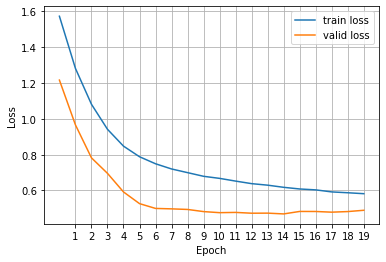

In [ ]:
plt.plot(range(N), loss_train_hist, label = 'train loss')
plt.plot(range(N), loss_valid_hist, label = 'valid loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.xticks(np.arange(1, N))
plt.grid()
plt.show()

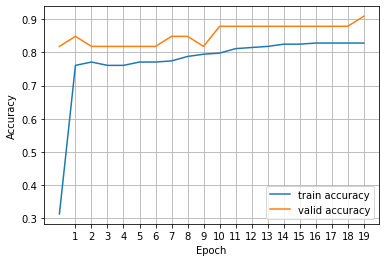

In [ ]:
plt.plot(range(N), acc_train_hist, label = 'train accuracy')
plt.plot(range(N), acc_valid_hist, label = 'valid accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.xticks(np.arange(1, N))
plt.grid()
plt.show()

In [ ]:
nn.CrossEntropyLoss()(model(cnn_valid, numerical_valid), yvalid)

tensor(0.5589, grad_fn=<NllLossBackward0>)

In [ ]:
#part 2

In [303]:
class CNNModel(nn.Module):

    def __init__(self, num_filters, kernel_size, num_out_reg, num_classes):
        super().__init__()

        self.conv1 = nn.LazyConv2d(num_filters[0], kernel_size[0], stride = 1, padding = 1, bias = True)
        self.bn1 = nn.BatchNorm2d(num_filters[0])

        self.conv2 = nn.LazyConv2d(num_filters[1], kernel_size[1], stride = 1, padding = 1, bias = True)
        self.bn2 = nn.BatchNorm2d(num_filters[1])

        self.conv3 = nn.LazyConv2d(num_filters[1], kernel_size[1], stride = 1, padding = 1, bias = True)
        self.bn3 = nn.BatchNorm2d(num_filters[1])

        self.mpool = nn.MaxPool2d(2, 2)
        self.apool = nn.AdaptiveAvgPool2d(output_size=(1, 1))

        self.fc = nn.LazyLinear(num_classes)
        self.fcv = nn.LazyLinear(num_out_reg)
        self.seq = nn.Sequential(nn.LazyLinear(4), nn.LeakyReLU(), nn.LazyLinear(4), nn.LazyLinear(4), nn.ReLU(), nn.LazyLinear(num_out_reg))

    def forward(self, cnn_data):

        y = self.bn1(self.conv1(cnn_data)).relu()
        y = self.mpool(y)
        y = self.bn2(self.conv2(y)).relu()

        y = self.apool(y)

        y = y.flatten(1)

        y_class = self.fc(y)

        y = self.bn3(self.conv3(cnn_data))

        y = y.flatten(1)

        y_reg = self.seq(y)

        return y_reg, y_class

In [304]:
device = 'cpu' if tc.cuda.is_available() else 'cpu'

In [305]:
model = CNNModel([16, 16], [3, 3], 4, 5)

In [306]:
y_reg, y_class = model(cnn_train)

In [307]:
y_reg.shape

torch.Size([148, 4])

In [308]:
y_class.shape

torch.Size([148, 5])

In [326]:
def train_one_epoch(model, cnn_train_loader, loss_func_reg, loss_func_class, optimizer, epoch):
    model.train()

    train_loss_reg = AverageMeter()
    train_loss_class = AverageMeter()
    train_acc_class = Accuracy(task = 'multiclass', num_classes=5).to(device)

    with tqdm(cnn_train_loader, unit = 'batch') as tepoch:
        
        i = 0

        for xc, yc in tepoch:
            if epoch is not None:
                tepoch.set_description(f'Epoch={epoch}')
            xn, yn = num_choose(i, numerical_train_loader)
            i +=1

            xn = xn.to(device)
            xc = xc.to(device)

            yn = yn.to(device)

            y_reg, y_class = model(xc)
            loss_reg = loss_func_reg(y_reg, xn)
            loss_class = loss_func_class(y_class, yn)

            loss_reg.backward(retain_graph=True)
            loss_class.backward()

            optimizer.step()
            optimizer.zero_grad()

            train_loss_reg.update(loss_reg.item())
            train_loss_class.update(loss_class.item())

            train_acc_class(y_class, yn)

            reg_loss = train_loss_reg.avg
            class_loss = train_loss_class.avg

            tepoch.set_postfix(loss_reg = reg_loss,
                                loss_class = class_loss,
                                loss = (reg_loss + class_loss))

        return model, train_loss_reg.avg, train_loss_class.avg

In [327]:
def validation(model, cnn_valid_loader, loss_func_reg, loss_func_class):
    model.eval()

    valid_loss_reg = AverageMeter()
    valid_loss_class = AverageMeter()
    valid_acc_class = Accuracy(task = 'multiclass', num_classes=5)
    
    i = 0
    for xc, yc in cnn_valid_loader:
        
        xn, yn = num_choose(i, numerical_valid_loader)
        i += 1

        xn = xn.to(device)
        xc = xc.to(device)

        yn = yn.to(device)

        y_reg, y_class = model(xc)
        loss_reg = loss_func_reg(y_reg, xn)
        loss_class = loss_func_class(y_class, yn)

        valid_loss_reg.update(loss_reg.item())
        valid_loss_class.update(loss_class.item())

        valid_acc_class(y_class, yn)

        reg_loss = valid_loss_reg.avg
        class_loss = valid_loss_class.avg
        total_loss = reg_loss + class_loss

    print(f'regression loss={reg_loss}, classification loss={class_loss}, Loss(total)={total_loss}')


    return valid_loss_reg.avg, valid_loss_class.avg

In [328]:
model = CNNModel([8, 8], [3, 3], 4, 5).to(device)

/home/ahmadreza/anaconda3/lib/python3.9/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


In [329]:
optimizer = optim.Adam(model.parameters(), lr = 0.001, betas=[0.9, 0.99])
loss_func_reg = nn.HuberLoss()
loss_func_class = nn.CrossEntropyLoss()

In [330]:
for i in range(100):
    model, _, _ = train_one_epoch(model, cnn_train_loader, loss_func_reg, loss_func_class, optimizer, i)

Epoch=5:   0%|          | 0/5 [00:00<?, ?batch/s]


KeyboardInterrupt: 

In [179]:
validation(model, cnn_valid_loader, loss_func_reg, loss_func_class)

regression loss=23.772396087646484, classification loss=0.7540874481201172, Loss(total)=24.5264835357666


(23.772396087646484, 0.7540874481201172)

In [344]:
model = CNNModel([8, 8], [3, 3], 4, 5).to(device)

In [345]:
optimizer = optim.Adam(model.parameters(), lr = 0.01, betas=[0.9, 0.99], weight_decay=1e-4)
loss_func_reg = nn.HuberLoss()
loss_func_class = nn.CrossEntropyLoss()

In [346]:
N=50

loss_train_hist_reg,loss_valid_hist_reg=[],[]
loss_train_hist_class,loss_valid_hist_class=[],[]

best_loss = tc.inf
best_model = [0]

for epoch in range(N):

  model, train_loss_reg, train_loss_class = train_one_epoch(model, cnn_train_loader, loss_func_reg, loss_func_class, optimizer, epoch)
  valid_loss_reg, valid_loss_class = validation(model, cnn_valid_loader, loss_func_reg, loss_func_class)

  loss_train_hist_reg.append(train_loss_reg)
  loss_train_hist_class.append(train_loss_class)

  loss_valid_hist_reg.append(valid_loss_reg)
  loss_valid_hist_class.append(valid_loss_class)

  valid_loss_total = (valid_loss_reg + valid_loss_class)

  if valid_loss_total<best_loss:
    best_model[0] = model 
    best_loss = valid_loss_total
    print('model saved!')

Epoch=0: 100%|██████████| 5/5 [00:03<00:00,  1.51batch/s, loss=15.6, loss_class=1.24, loss_reg=14.4] 


regression loss=4.006131172180176, classification loss=0.8750192721684774, Loss(total)=4.881150444348653
model saved!


Epoch=1: 100%|██████████| 5/5 [00:02<00:00,  1.83batch/s, loss=6.91, loss_class=1.06, loss_reg=5.85]


regression loss=8.043414115905762, classification loss=0.6839408477147421, Loss(total)=8.727354963620504


Epoch=2: 100%|██████████| 5/5 [00:02<00:00,  1.76batch/s, loss=4.16, loss_class=0.929, loss_reg=3.23]


regression loss=1.604815701643626, classification loss=0.6198665698369344, Loss(total)=2.2246822714805603
model saved!


Epoch=3: 100%|██████████| 5/5 [00:02<00:00,  1.81batch/s, loss=1.57, loss_class=0.858, loss_reg=0.709]


regression loss=0.6299732526143392, classification loss=0.5424610177675883, Loss(total)=1.1724342703819275
model saved!


Epoch=4: 100%|██████████| 5/5 [00:02<00:00,  1.84batch/s, loss=1.3, loss_class=0.824, loss_reg=0.472] 


regression loss=0.5607215265432993, classification loss=0.4601915975411733, Loss(total)=1.0209131240844727
model saved!


Epoch=5: 100%|██████████| 5/5 [00:02<00:00,  1.88batch/s, loss=1.26, loss_class=0.804, loss_reg=0.453]


regression loss=0.5445126891136169, classification loss=0.44380231698354083, Loss(total)=0.9883150060971577
model saved!


Epoch=6: 100%|██████████| 5/5 [00:02<00:00,  1.75batch/s, loss=1.24, loss_class=0.79, loss_reg=0.447] 


regression loss=0.5255941450595856, classification loss=0.4419759015242259, Loss(total)=0.9675700465838115
model saved!


Epoch=7: 100%|██████████| 5/5 [00:02<00:00,  1.87batch/s, loss=1.22, loss_class=0.779, loss_reg=0.441]


regression loss=0.41218849023183185, classification loss=0.4233596722284953, Loss(total)=0.8355481624603271
model saved!


Epoch=8: 100%|██████████| 5/5 [00:02<00:00,  1.74batch/s, loss=1.21, loss_class=0.773, loss_reg=0.435]


regression loss=0.40457486112912494, classification loss=0.4080248574415843, Loss(total)=0.8125997185707092
model saved!


Epoch=9: 100%|██████████| 5/5 [00:02<00:00,  1.88batch/s, loss=1.19, loss_class=0.767, loss_reg=0.428]


regression loss=0.39729657769203186, classification loss=0.4213174680868785, Loss(total)=0.8186140457789104


Epoch=10: 100%|██████████| 5/5 [00:02<00:00,  1.88batch/s, loss=1.18, loss_class=0.762, loss_reg=0.422]


regression loss=0.3905024329821269, classification loss=0.38428569833437604, Loss(total)=0.7747881313165029
model saved!


Epoch=11: 100%|██████████| 5/5 [00:02<00:00,  1.88batch/s, loss=1.17, loss_class=0.755, loss_reg=0.416]


regression loss=0.3842628002166748, classification loss=0.37185203035672504, Loss(total)=0.7561148305733998
model saved!


Epoch=12: 100%|██████████| 5/5 [00:02<00:00,  1.70batch/s, loss=1.16, loss_class=0.749, loss_reg=0.41] 


regression loss=0.3786064386367798, classification loss=0.3416566848754883, Loss(total)=0.7202631235122681
model saved!


Epoch=13: 100%|██████████| 5/5 [00:02<00:00,  1.70batch/s, loss=1.15, loss_class=0.743, loss_reg=0.406]


regression loss=0.3735324839750926, classification loss=0.3350566327571869, Loss(total)=0.7085891167322795
model saved!


Epoch=14: 100%|██████████| 5/5 [00:02<00:00,  1.73batch/s, loss=1.14, loss_class=0.738, loss_reg=0.402]


regression loss=0.36901334921518963, classification loss=0.31537258128325146, Loss(total)=0.6843859304984411
model saved!


Epoch=15: 100%|██████████| 5/5 [00:03<00:00,  1.65batch/s, loss=1.13, loss_class=0.732, loss_reg=0.398]


regression loss=0.36501140395800274, classification loss=0.3479509751001994, Loss(total)=0.7129623790582021


Epoch=16: 100%|██████████| 5/5 [00:02<00:00,  1.72batch/s, loss=1.12, loss_class=0.725, loss_reg=0.395]


regression loss=0.3614864746729533, classification loss=0.3823867936929067, Loss(total)=0.74387326836586


Epoch=17: 100%|██████████| 5/5 [00:02<00:00,  1.70batch/s, loss=1.11, loss_class=0.718, loss_reg=0.392]


regression loss=0.35839684804280597, classification loss=0.2941667288541794, Loss(total)=0.6525635768969853
model saved!


Epoch=18: 100%|██████████| 5/5 [00:02<00:00,  1.74batch/s, loss=1.11, loss_class=0.721, loss_reg=0.39] 


regression loss=0.355705589056015, classification loss=0.39732396602630615, Loss(total)=0.7530295550823212


Epoch=19: 100%|██████████| 5/5 [00:02<00:00,  1.75batch/s, loss=1.1, loss_class=0.717, loss_reg=0.387] 


regression loss=0.35337574283281964, classification loss=0.31706895927588147, Loss(total)=0.6704447021087011


Epoch=20: 100%|██████████| 5/5 [00:02<00:00,  1.78batch/s, loss=1.09, loss_class=0.705, loss_reg=0.383]


regression loss=0.35136247674624127, classification loss=0.34545738498369855, Loss(total)=0.6968198617299398


Epoch=21: 100%|██████████| 5/5 [00:02<00:00,  1.78batch/s, loss=1.08, loss_class=0.7, loss_reg=0.381]  


regression loss=0.34962578614552814, classification loss=0.2513973241051038, Loss(total)=0.6010231102506319
model saved!


Epoch=22: 100%|██████████| 5/5 [00:02<00:00,  1.82batch/s, loss=1.08, loss_class=0.697, loss_reg=0.38] 


regression loss=0.34813756744066876, classification loss=0.4466634889443715, Loss(total)=0.7948010563850403


Epoch=23: 100%|██████████| 5/5 [00:02<00:00,  1.78batch/s, loss=1.07, loss_class=0.69, loss_reg=0.38]  


regression loss=0.3468688229719798, classification loss=0.39438875516255695, Loss(total)=0.7412575781345367


Epoch=24: 100%|██████████| 5/5 [00:03<00:00,  1.53batch/s, loss=1.07, loss_class=0.688, loss_reg=0.379]


regression loss=0.34579163789749146, classification loss=0.41188634435335797, Loss(total)=0.7576779822508495


Epoch=25: 100%|██████████| 5/5 [00:03<00:00,  1.59batch/s, loss=1.06, loss_class=0.683, loss_reg=0.379]


regression loss=0.3448801139990489, classification loss=0.396118700504303, Loss(total)=0.7409988145033519


Epoch=26: 100%|██████████| 5/5 [00:03<00:00,  1.45batch/s, loss=1.06, loss_class=0.68, loss_reg=0.378] 


regression loss=0.3441106379032135, classification loss=0.34646135568618774, Loss(total)=0.6905719935894012


Epoch=27: 100%|██████████| 5/5 [00:02<00:00,  1.72batch/s, loss=1.06, loss_class=0.678, loss_reg=0.378]


regression loss=0.343462606271108, classification loss=0.33233743409315747, Loss(total)=0.6758000403642654


Epoch=28: 100%|██████████| 5/5 [00:03<00:00,  1.49batch/s, loss=1.05, loss_class=0.675, loss_reg=0.378]


regression loss=0.3429181973139445, classification loss=0.31338079770406085, Loss(total)=0.6562989950180054


Epoch=29: 100%|██████████| 5/5 [00:03<00:00,  1.65batch/s, loss=1.05, loss_class=0.674, loss_reg=0.378]


regression loss=0.34246217211087543, classification loss=0.3396588017543157, Loss(total)=0.6821209738651911


Epoch=30: 100%|██████████| 5/5 [00:03<00:00,  1.65batch/s, loss=1.05, loss_class=0.674, loss_reg=0.378]


regression loss=0.3420814275741577, classification loss=0.3460244635740916, Loss(total)=0.6881058911482494


Epoch=31: 100%|██████████| 5/5 [00:03<00:00,  1.34batch/s, loss=1.05, loss_class=0.674, loss_reg=0.378]


regression loss=0.34176477789878845, classification loss=0.3945295413335164, Loss(total)=0.7362943192323048


Epoch=32: 100%|██████████| 5/5 [00:03<00:00,  1.49batch/s, loss=1.05, loss_class=0.673, loss_reg=0.378]


regression loss=0.3415026068687439, classification loss=0.5342010160287222, Loss(total)=0.8757036228974661


Epoch=33: 100%|██████████| 5/5 [00:02<00:00,  1.71batch/s, loss=1.05, loss_class=0.668, loss_reg=0.377]


regression loss=0.34128673871358234, classification loss=0.3719743837912877, Loss(total)=0.7132611225048701


Epoch=34: 100%|██████████| 5/5 [00:02<00:00,  1.70batch/s, loss=1.05, loss_class=0.671, loss_reg=0.377]


regression loss=0.3411101500193278, classification loss=0.37482770284016925, Loss(total)=0.7159378528594971


Epoch=35: 100%|██████████| 5/5 [00:03<00:00,  1.64batch/s, loss=1.05, loss_class=0.676, loss_reg=0.377]


regression loss=0.3409668306509654, classification loss=0.3486992468436559, Loss(total)=0.6896660774946213


Epoch=36: 100%|██████████| 5/5 [00:02<00:00,  1.75batch/s, loss=1.05, loss_class=0.672, loss_reg=0.377]


regression loss=0.3408515353997548, classification loss=0.314343382914861, Loss(total)=0.6551949183146158


Epoch=37: 100%|██████████| 5/5 [00:03<00:00,  1.65batch/s, loss=1.05, loss_class=0.668, loss_reg=0.377]


regression loss=0.3407597839832306, classification loss=0.30777280032634735, Loss(total)=0.6485325843095779


Epoch=38: 100%|██████████| 5/5 [00:02<00:00,  1.75batch/s, loss=1.05, loss_class=0.669, loss_reg=0.377]


regression loss=0.34068763256073, classification loss=0.503760834534963, Loss(total)=0.844448467095693


Epoch=39: 100%|██████████| 5/5 [00:02<00:00,  1.71batch/s, loss=1.04, loss_class=0.664, loss_reg=0.377] 


regression loss=0.34063172340393066, classification loss=0.32633231083552044, Loss(total)=0.6669640342394512


Epoch=40: 100%|██████████| 5/5 [00:03<00:00,  1.64batch/s, loss=1.04, loss_class=0.662, loss_reg=0.377] 


regression loss=0.34058908621470135, classification loss=0.370730996131897, Loss(total)=0.7113200823465984


Epoch=41: 100%|██████████| 5/5 [00:02<00:00,  1.72batch/s, loss=1.04, loss_class=0.658, loss_reg=0.377] 


regression loss=0.34055723746617633, classification loss=0.38561401267846424, Loss(total)=0.7261712501446406


Epoch=42: 100%|██████████| 5/5 [00:02<00:00,  1.71batch/s, loss=1.04, loss_class=0.662, loss_reg=0.377]


regression loss=0.3405339519182841, classification loss=0.5711733301480612, Loss(total)=0.9117072820663452


Epoch=43: 100%|██████████| 5/5 [00:02<00:00,  1.82batch/s, loss=1.03, loss_class=0.655, loss_reg=0.377]


regression loss=0.34051740169525146, classification loss=0.3716665307680766, Loss(total)=0.7121839324633281


Epoch=44: 100%|██████████| 5/5 [00:02<00:00,  1.74batch/s, loss=1.03, loss_class=0.655, loss_reg=0.377] 


regression loss=0.34050607681274414, classification loss=0.4209910233815511, Loss(total)=0.7614971001942952


Epoch=45: 100%|██████████| 5/5 [00:02<00:00,  1.85batch/s, loss=1.03, loss_class=0.651, loss_reg=0.377]


regression loss=0.3404986461003621, classification loss=0.35780205329259235, Loss(total)=0.6983006993929545


Epoch=46: 100%|██████████| 5/5 [00:03<00:00,  1.57batch/s, loss=1.03, loss_class=0.652, loss_reg=0.377] 


regression loss=0.3404941260814667, classification loss=0.45337405800819397, Loss(total)=0.7938681840896606


Epoch=47: 100%|██████████| 5/5 [00:03<00:00,  1.54batch/s, loss=1.03, loss_class=0.648, loss_reg=0.377] 


regression loss=0.3404916028181712, classification loss=0.2967266688744227, Loss(total)=0.6372182716925939


Epoch=48: 100%|██████████| 5/5 [00:03<00:00,  1.58batch/s, loss=1.03, loss_class=0.65, loss_reg=0.377]  


regression loss=0.34049047032992047, classification loss=0.454103281100591, Loss(total)=0.7945937514305115


Epoch=49: 100%|██████████| 5/5 [00:02<00:00,  1.75batch/s, loss=1.03, loss_class=0.652, loss_reg=0.377]

regression loss=0.340490182240804, classification loss=0.3327418963114421, Loss(total)=0.6732320785522461


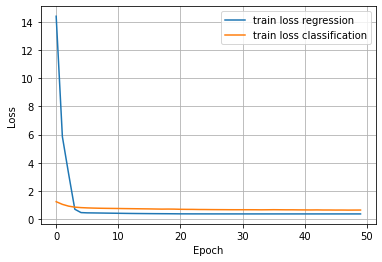

In [347]:
plt.plot(range(N), loss_train_hist_reg, label = 'train loss regression')
plt.plot(range(N), loss_train_hist_class, label = 'train loss classification')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
#plt.xticks(np.arange(1, N))
plt.grid()
plt.show()

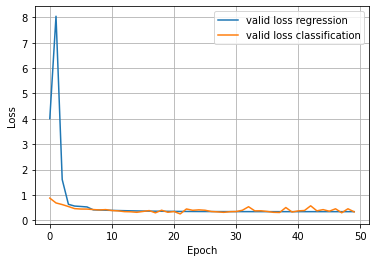

In [348]:
plt.plot(range(N), loss_valid_hist_reg, label = 'valid loss regression')
plt.plot(range(N), loss_valid_hist_class, label = 'valid loss classification')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
#plt.xticks(np.arange(1, N))
plt.grid()
plt.show()

In [336]:
# I should be better that use distinct models